In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("gender.csv" , encoding= "ISO-8859–1")
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


### Understanding Dataset with the help of info(), describe(), shape, corr()

In [8]:
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [10]:
df.shape

(20050, 26)

In [11]:
df.corr()

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.208055,0.207651,0.007918,0.015168,0.024878,-0.004337,-0.024809,0.844887
_golden,0.208055,1.000000,0.998592,0.008818,0.005592,0.003794,-0.000744,-0.009669,-0.005985
_trusted_judgments,0.207651,0.998592,1.000000,0.009550,0.005543,0.003851,-0.000765,-0.009703,-0.005781
gender:confidence,0.007918,0.008818,0.009550,1.000000,0.313628,-0.030889,-0.004947,-0.013558,0.027901
profile_yn:confidence,0.015168,0.005592,0.005543,0.313628,1.000000,-0.003256,0.001376,-0.012665,0.019044
fav_number,0.024878,0.003794,0.003851,-0.030889,-0.003256,1.000000,0.008274,0.066733,0.041788
retweet_count,-0.004337,-0.000744,-0.000765,-0.004947,0.001376,0.008274,1.000000,-0.001263,-0.006466
tweet_count,-0.024809,-0.009669,-0.009703,-0.013558,-0.012665,0.066733,-0.001263,1.000000,-0.037836
tweet_id,0.844887,-0.005985,-0.005781,0.027901,0.019044,0.041788,-0.006466,-0.037836,1.000000


## Cleaning 

In [12]:
df = df[['_unit_id', '_unit_state',                                                              
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'fav_number', 'link_color', 'name', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_count',
       'tweet_created', 'tweet_id']]
                                                                                                    # Cleaning
df = df[(df['gender'] == 'male') | (df['gender'] == 'female')]
df = df.dropna()

df

,_unit_id,_unit_state,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,815719226,finalized,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,815719227,finalized,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,815719228,finalized,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17
3,815719229,finalized,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17
4,815719230,finalized,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,815739589,finalized,10/26/15 23:44,female,1.0000,yes,1.0,7/21/09 11:45,3745,FF0000,StephanieBucher,https://pbs.twimg.com/profile_images/658459980...,0,65B0DA,Nothing like slipping at school running to you...,10727,10/26/15 13:18,6.587400e+17
19995,815739590,finalized,10/26/15 23:04,male,1.0000,yes,1.0,1/24/13 11:55,33834,ABB8C2,AntiHero94,https://pbs.twimg.com/profile_images/653014313...,1,0,Seriously love Trent and Justin. Would do anyt...,29190,10/26/15 13:18,6.587400e+17
19996,815739591,finalized,10/27/15 1:40,male,1.0000,yes,1.0,12/19/14 13:54,2462,0084B4,dredoo24,https://pbs.twimg.com/profile_images/633240548...,0,C0DEED,One person can look at you like your the most ...,11117,10/26/15 13:18,6.587400e+17
19997,815739592,finalized,10/27/15 0:03,female,1.0000,yes,1.0,4/15/15 19:15,1855,664422,6BETHANY4Victor,https://pbs.twimg.com/profile_images/657192653...,0,0,These 24 Wedding Photobombs Made The Bride And...,5640,10/26/15 13:18,6.587400e+17


In [13]:
df.shape

(12858, 18)

The dataset is now free of null values. We have removed columns which consist of null or no value or which has very few values. Gender column is filtered to have only male and female values.
The resultant dataset has 12858 rows and 18 coulmns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12858 entries, 0 to 19998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               12858 non-null  int64  
 1   _unit_state            12858 non-null  object 
 2   _last_judgment_at      12858 non-null  object 
 3   gender                 12858 non-null  object 
 4   gender:confidence      12858 non-null  float64
 5   profile_yn             12858 non-null  object 
 6   profile_yn:confidence  12858 non-null  float64
 7   created                12858 non-null  object 
 8   fav_number             12858 non-null  int64  
 9   link_color             12858 non-null  object 
 10  name                   12858 non-null  object 
 11  profileimage           12858 non-null  object 
 12  retweet_count          12858 non-null  int64  
 13  sidebar_color          12858 non-null  object 
 14  text                   12858 non-null  object 
 15  tw

In [15]:
df.describe()

,_unit_id,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,1.285800e+04,12858.000000,12858.000000,12858.000000,12858.000000,1.285800e+04,1.285800e+04
mean,8.157297e+08,0.916067,0.994829,5470.163167,0.067118,2.950077e+04,6.587354e+17
std,6.056816e+03,0.165539,0.041389,13111.311824,1.526492,7.080812e+04,4.980086e+12
min,8.157192e+08,0.320600,0.630800,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157240e+08,1.000000,1.000000,137.000000,0.000000,2.273750e+03,6.587300e+17
50%,8.157302e+08,1.000000,1.000000,1126.000000,0.000000,9.328500e+03,6.587400e+17
75%,8.157350e+08,1.000000,1.000000,4962.250000,0.000000,3.027400e+04,6.587400e+17
max,8.157396e+08,1.000000,1.000000,341621.000000,153.000000,2.680199e+06,6.587400e+17


## Lable Encoding for gender

In [16]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['G'] = le.fit_transform(df['gender'])
                                            

<function matplotlib.pyplot.show(*args, **kw)>

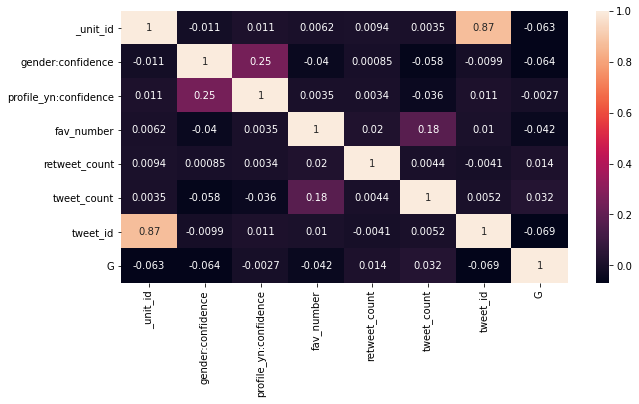

In [17]:
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(), annot = True)
plt.show

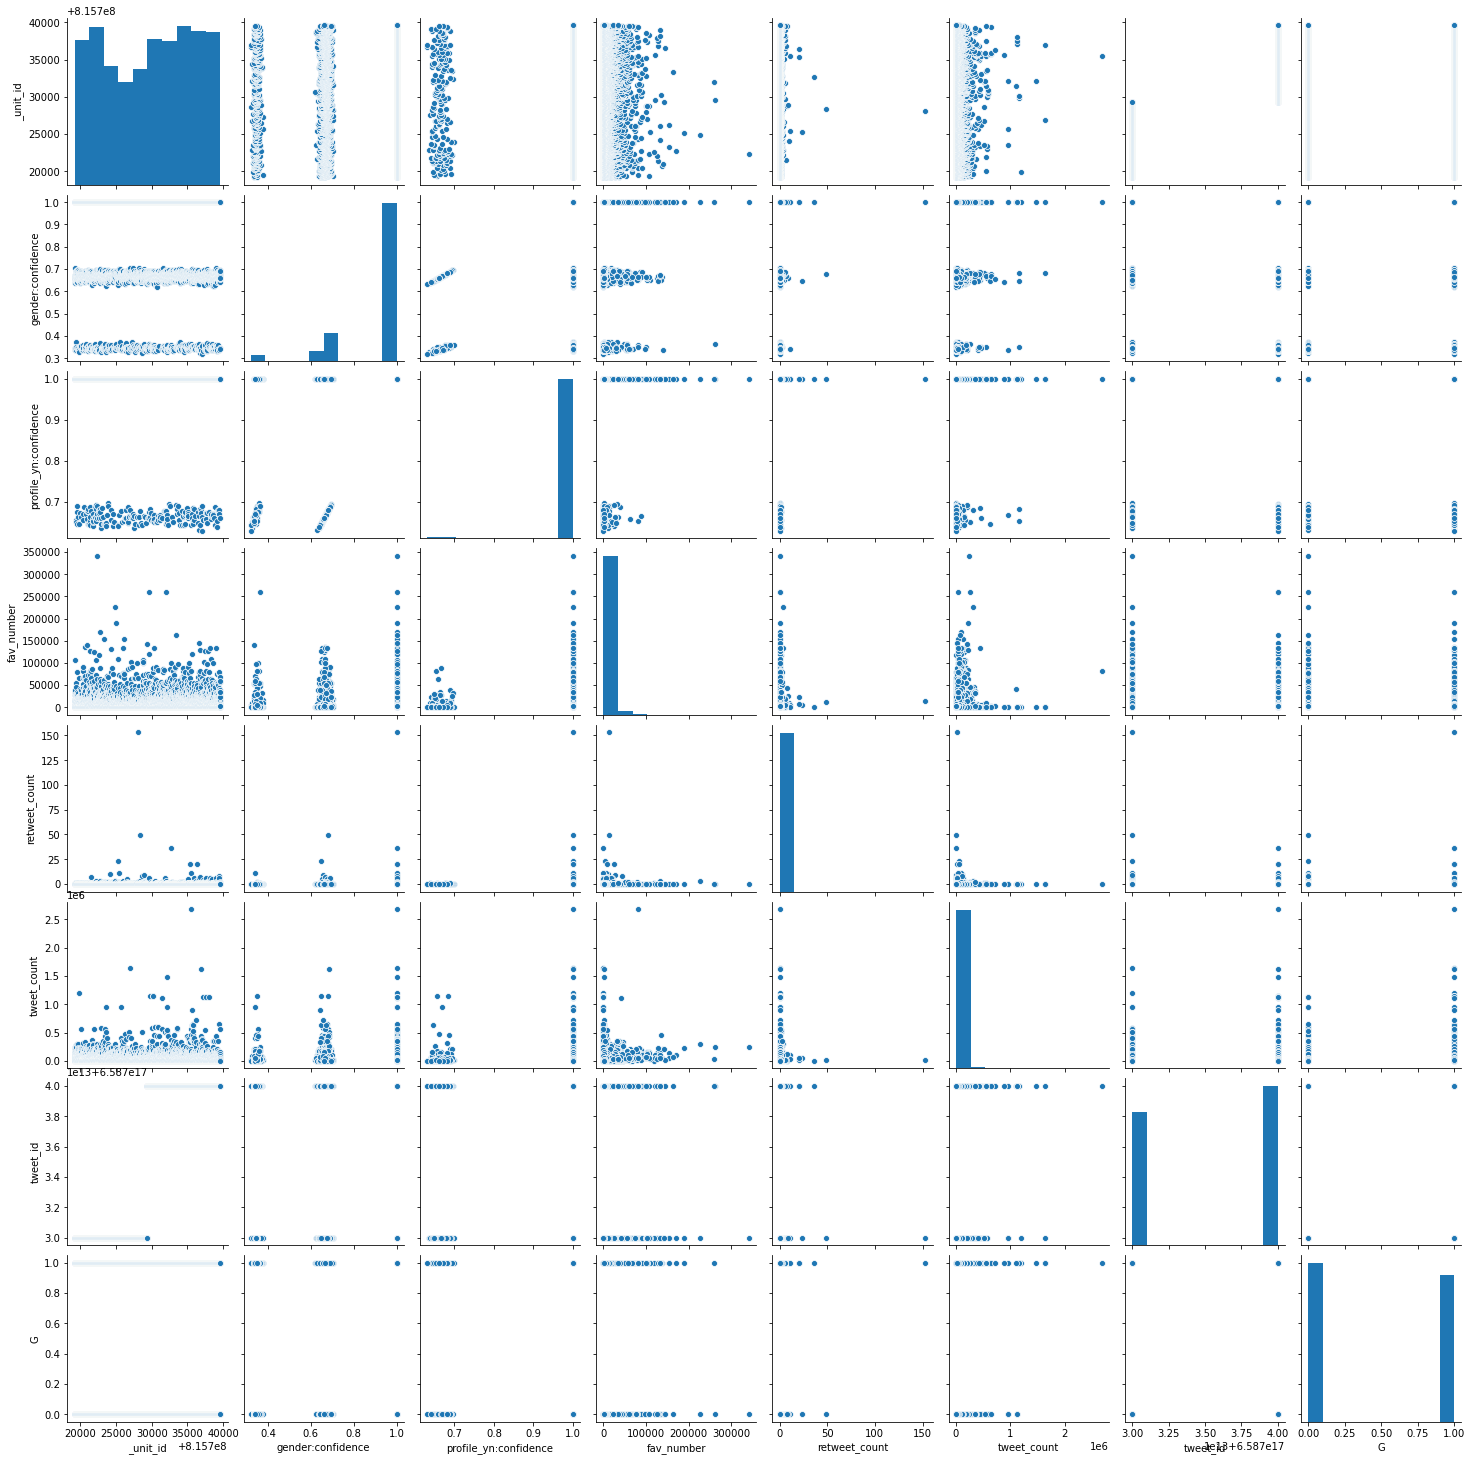

In [19]:
sb.pairplot(df)

In [20]:
df.columns

Index(['_unit_id', '_unit_state', '_last_judgment_at', 'gender',
       'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created',
       'fav_number', 'link_color', 'name', 'profileimage', 'retweet_count',
       'sidebar_color', 'text', 'tweet_count', 'tweet_created', 'tweet_id',
       'G'],
      dtype='object')

## Feature Selection 

In [21]:
X = df[[ 'gender:confidence', 'profile_yn:confidence']].values
Y = df[['gender']].values

## Splitting the Data 

In [22]:
from sklearn.model_selection import train_test_split                             
                                                                                       
X_test, X_train, Y_test, Y_train = train_test_split(X, Y)
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape

((9643, 2), (3215, 2), (9643, 1), (3215, 1))

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
                                                                                            # Logistic Regression
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_test)

C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5323032251374054

## KNN modelling

In [24]:
from sklearn.neighbors import KNeighborsClassifier                                         
knn = KNeighborsClassifier()
                                                                                      
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_pred, Y_test)

<ipython-input-24-83d91ed610cf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)


0.5279477341076428

## SVM Modelling

In [25]:
from sklearn.svm import SVC
svc = SVC()
                                                                                         
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)

accuracy_score(y_pred, Y_test)

C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5334439489785336

# Question and Answers

### Question 1 - Average number of words used by males and females


In [31]:
mdf=df[(df['gender']=='male')]                                                      # Question 1
mdf['count'] = mdf['text'].str.split().str.len()              
                                                                                   
meann = mdf[['count']].mean().round()                                    
print("The average number of words used by males is ", int(meann))

The average number of words used by males is  16


<ipython-input-31-f6f3e54f9203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['count'] = mdf['text'].str.split().str.len()


In [33]:
fdf=df[(df['gender']=='female')]
fdf['count'] = fdf['text'].str.split().str.len()

meann = fdf[['count']].mean().round()                                              # average number of words used by females
    
print("The average number of words use by females is ", int(meann))

The average number of words use by females is  16


<ipython-input-33-47a23480fc11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['count'] = fdf['text'].str.split().str.len()


### Question 2 - Maximum and Minimum words used by male(name) and female(female)

In [34]:
df1=df[['gender','text','name', 'G']]
df1                                                                                     # Question 2

,gender,text,name,G
0,male,Robbie E Responds To Critics After Win Against...,sheezy0,1
1,male,ÛÏIt felt like they were my friends and I was...,DavdBurnett,1
2,male,i absolutely adore when louis starts the songs...,lwtprettylaugh,1
3,male,Hi @JordanSpieth - Looking at the url - do you...,douggarland,1
4,female,Watching Neighbours on Sky+ catching up with t...,WilfordGemma,0
...,...,...,...,...
19994,female,Nothing like slipping at school running to you...,StephanieBucher,0
19995,male,Seriously love Trent and Justin. Would do anyt...,AntiHero94,1
19996,male,One person can look at you like your the most ...,dredoo24,1
19997,female,These 24 Wedding Photobombs Made The Bride And...,6BETHANY4Victor,0


In [35]:
import nltk
import numpy as np
arrdf1=np.array(df1)
arrdf1

array([['male',
        'Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ',
        'sheezy0', 1],
       ['male',
        '\x89ÛÏIt felt like they were my friends and I was living the story with them\x89Û\x9d https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz',
        'DavdBurnett', 1],
       ['male',
        'i absolutely adore when louis starts the songs it hits me hard but it feels good',
        'lwtprettylaugh', 1],
       ...,
       ['male',
        'One person can look at you like your the most beautiful thing inside and out and the next person can see the exact opposite. Just reality..',
        'dredoo24', 1],
       ['female',
        'These 24 Wedding Photobombs Made The Bride And Groom Day Much Better LOL. https://t.co/Ajna5JmhHH',
        '6BETHANY4Victor', 0],
       ['female',
        'So I am riding around and I saw a horse running, right? So I yelled "YOU GO HORSE!!" And it nodded it\'s head a

In [36]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

df1['text'] = df1['text'].replace(to_replace=r'https?:\/\/.*[\r\n]*',value='',regex=True)

df1

<ipython-input-36-91c15b87bb73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].replace(to_replace=r'https?:\/\/.*[\r\n]*',value='',regex=True)


,gender,text,name,G
0,male,Robbie E Responds To Critics After Win Against...,sheezy0,1
1,male,ÛÏIt felt like they were my friends and I was...,DavdBurnett,1
2,male,i absolutely adore when louis starts the songs...,lwtprettylaugh,1
3,male,Hi @JordanSpieth - Looking at the url - do you...,douggarland,1
4,female,Watching Neighbours on Sky+ catching up with t...,WilfordGemma,0
...,...,...,...,...
19994,female,Nothing like slipping at school running to you...,StephanieBucher,0
19995,male,Seriously love Trent and Justin. Would do anyt...,AntiHero94,1
19996,male,One person can look at you like your the most ...,dredoo24,1
19997,female,These 24 Wedding Photobombs Made The Bride And...,6BETHANY4Victor,0


In [37]:
df2=np.array(df1)
df2

array([['male',
        'Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries ',
        'sheezy0', 1],
       ['male',
        '\x89ÛÏIt felt like they were my friends and I was living the story with them\x89Û\x9d ',
        'DavdBurnett', 1],
       ['male',
        'i absolutely adore when louis starts the songs it hits me hard but it feels good',
        'lwtprettylaugh', 1],
       ...,
       ['male',
        'One person can look at you like your the most beautiful thing inside and out and the next person can see the exact opposite. Just reality..',
        'dredoo24', 1],
       ['female',
        'These 24 Wedding Photobombs Made The Bride And Groom Day Much Better LOL. ',
        '6BETHANY4Victor', 0],
       ['female',
        'So I am riding around and I saw a horse running, right? So I yelled "YOU GO HORSE!!" And it nodded it\'s head at me!!! ^O^',
        'SorasNerdyGeek', 0]], dtype=object)

In [38]:
def clean_tweets(text):
    df2['text']= re.sub(r'https.?://[^\s]+[\s]?', '', text)
    return " ".join(w for w in nltk.wordpunct_tokenize(text) \
     if w.lower() in words or not w.isalpha())

df1

,gender,text,name,G
0,male,Robbie E Responds To Critics After Win Against...,sheezy0,1
1,male,ÛÏIt felt like they were my friends and I was...,DavdBurnett,1
2,male,i absolutely adore when louis starts the songs...,lwtprettylaugh,1
3,male,Hi @JordanSpieth - Looking at the url - do you...,douggarland,1
4,female,Watching Neighbours on Sky+ catching up with t...,WilfordGemma,0
...,...,...,...,...
19994,female,Nothing like slipping at school running to you...,StephanieBucher,0
19995,male,Seriously love Trent and Justin. Would do anyt...,AntiHero94,1
19996,male,One person can look at you like your the most ...,dredoo24,1
19997,female,These 24 Wedding Photobombs Made The Bride And...,6BETHANY4Victor,0


In [39]:
import re

df1['text'] = df1['text'].apply(lambda x: re.sub('[!@#$%‰û�:).;,?&-]', '', x.lower()))
df1['text'] = df1['text'].apply(lambda x: re.sub('  ', ' ', x))

df2=np.array(df1)
df2

<ipython-input-39-b8076f5a7aed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(lambda x: re.sub('[!@#$%‰û�:).;,?&-]', '', x.lower()))
<ipython-input-39-b8076f5a7aed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(lambda x: re.sub('  ', ' ', x))


array([['male',
        'robbie e responds to critics after win against eddie edwards in the worldtitleseries ',
        'sheezy0', 1],
       ['male',
        '\x89ïit felt like they were my friends and i was living the story with them\x89\x9d ',
        'DavdBurnett', 1],
       ['male',
        'i absolutely adore when louis starts the songs it hits me hard but it feels good',
        'lwtprettylaugh', 1],
       ...,
       ['male',
        'one person can look at you like your the most beautiful thing inside and out and the next person can see the exact opposite just reality',
        'dredoo24', 1],
       ['female',
        'these 24 wedding photobombs made the bride and groom day much better lol ',
        '6BETHANY4Victor', 0],
       ['female',
        'so i am riding around and i saw a horse running right so i yelled "you go horse" and it nodded it\'s head at me ^o^',
        'SorasNerdyGeek', 0]], dtype=object)

In [40]:
df1

,gender,text,name,G
0,male,robbie e responds to critics after win against...,sheezy0,1
1,male,ïit felt like they were my friends and i was ...,DavdBurnett,1
2,male,i absolutely adore when louis starts the songs...,lwtprettylaugh,1
3,male,hi jordanspieth looking at the url do you use ...,douggarland,1
4,female,watching neighbours on sky+ catching up with t...,WilfordGemma,0
...,...,...,...,...
19994,female,nothing like slipping at school running to you...,StephanieBucher,0
19995,male,seriously love trent and justin would do anyth...,AntiHero94,1
19996,male,one person can look at you like your the most ...,dredoo24,1
19997,female,these 24 wedding photobombs made the bride and...,6BETHANY4Victor,0


In [41]:
mdf=df1[(df1['gender']=='male')]
                                                                                                 
mdf['totalwords'] = mdf['text'].str.split().str.len()

mdf

<ipython-input-41-4e1ed67b1b70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['totalwords'] = mdf['text'].str.split().str.len()


,gender,text,name,G,totalwords
0,male,robbie e responds to critics after win against...,sheezy0,1,13
1,male,ïit felt like they were my friends and i was ...,DavdBurnett,1,15
2,male,i absolutely adore when louis starts the songs...,lwtprettylaugh,1,16
3,male,hi jordanspieth looking at the url do you use ...,douggarland,1,19
7,male,gala bingo clubs bought for å£241m the uk's la...,RobinMeske,1,19
...,...,...,...,...,...
19989,male,the (rather thin analysis of the federal elect...,blackwellglobe,1,19
19991,male,one should be able to express themselves with ...,SamuelWhiskey2,1,25
19993,male,processed meat is bad for you well fuck me the...,DJD_ice,1,19
19995,male,seriously love trent and justin would do anyth...,AntiHero94,1,11


In [42]:
mt=mdf['totalwords']
min(mt)

0

In [43]:
max(mt)

32

In [44]:
min_male=mdf[mdf['totalwords']==min(mt)]
                                                                                            # Males with min. no. of text
min_male

,gender,text,name,G,totalwords
440,male,,LiverpoolSailor,1,0
777,male,,youngali1864,1,0
4468,male,,WelcomeMeBack,1,0
5171,male,,potterscarniall,1,0
7935,male,,ohiscot21,1,0
12455,male,,LFCibe,1,0
14122,male,,large___cool,1,0
14389,male,,ShadowCannard,1,0
15559,male,,IcanChangeBaby,1,0
16077,male,,Mi_chan785,1,0


In [45]:
min_male[['name']]

,name
440,LiverpoolSailor
777,youngali1864
4468,WelcomeMeBack
5171,potterscarniall
7935,ohiscot21
12455,LFCibe
14122,large___cool
14389,ShadowCannard
15559,IcanChangeBaby
16077,Mi_chan785


In [46]:
max_male=mdf[mdf['totalwords']==max(mt)]
                                                                                             # Males with max. no. of text
max_male

,gender,text,name,G,totalwords
17857,male,ernie20056 my love i want to say to you have a...,ernie20056,1,32


In [47]:
fdf=df1[(df1['gender']=='female')]

fdf['totalwords'] = fdf['text'].str.split().str.len()

fdf

<ipython-input-47-98968fc6bd5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['totalwords'] = fdf['text'].str.split().str.len()


,gender,text,name,G,totalwords
4,female,watching neighbours on sky+ catching up with t...,WilfordGemma,0,12
5,female,ive seen people on the train with lamps chairs...,monroevicious,0,11
8,female,_aphmau_ the pic defines all mcd fangirls/fanb...,pigzilla_,0,11
9,female,evielady just how lovely is the tree this year...,GabrieleNeher,0,18
12,female,just put my ass on the line for you and this i...,kaylanabrewer_,0,16
...,...,...,...,...,...
19990,female,i constantly search the radio for hello hotlin...,Berniee42,0,14
19992,female,she always with her man _ù÷¢_ù÷¢_ù÷¢ and i jus...,nadiagotfanss,0,14
19994,female,nothing like slipping at school running to you...,StephanieBucher,0,14
19997,female,these 24 wedding photobombs made the bride and...,6BETHANY4Victor,0,13


In [48]:
ft=fdf['totalwords']
min(ft)

0

In [49]:
max(ft)   

33

In [50]:
min_female=fdf[fdf['totalwords']==min(ft)]
                                                                                            # Females with min. no. of text
min_female

,gender,text,name,G,totalwords
15,female,,Ayu7sith4,0,0
110,female,,Ayu7sith4,0,0
396,female,,LeveragYourBook,0,0
419,female,,DeniseCassino,0,0
561,female,,Ayu7sith4,0,0
727,female,,Ayu7sith4,0,0
8322,female,,OriginalOffers,0,0
9521,female,,OriginalOffers,0,0
10655,female,,ramadewi24,0,0
10787,female,,cintamanis242,0,0


In [51]:
min_female[['name']]

,name
15,Ayu7sith4
110,Ayu7sith4
396,LeveragYourBook
419,DeniseCassino
561,Ayu7sith4
727,Ayu7sith4
8322,OriginalOffers
9521,OriginalOffers
10655,ramadewi24
10787,cintamanis242


In [52]:
max_female=fdf[fdf['totalwords']==max(ft)]
                                                                                             # Females with max. no. of text
max_female

,gender,text,name,G,totalwords
6070,female,my mom made me order food and she picked it up...,brittanynd71,0,33
12770,female,sigh seems like i need to try and bring it ove...,jezkwon,0,33
13657,female,i mean it takes me whole day to sit at a spot ...,GODCHILDUNICORN,0,33
17910,female,refi reminded me we have to remake our skype c...,swooce_right_in,0,33


In [53]:
max_female[['name']]

,name
6070,brittanynd71
12770,jezkwon
13657,GODCHILDUNICORN
17910,swooce_right_in
